In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv("/content/Telco_Customer_Churn.csv")
data = df.copy()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df['gender'] = (df['gender'] == 'Male').astype(int)
df['Partner'] = (df['Partner'] == 'Yes').astype(int)
df['Dependents'] = (df['Dependents'] == 'Yes').astype(int)
df['PhoneService'] = (df['PhoneService'] == 'Yes').astype(int)
df['PaperlessBilling'] = (df['PaperlessBilling'] == 'Yes').astype(int)

In [4]:
df['MultipleLines'] = df['MultipleLines'].replace(
    'No phone service', 'No'
)

df['MultipleLines'] = (df['MultipleLines'] == 'Yes').astype(int)

In [5]:
# Create controller feature (ONCE)
df['HasInternet'] = (df['InternetService'] != 'No').astype(int)

mapping = {
    'No': 1,
    'DSL': 2,
    'Fiber optic': 3
}

df['InternetService'] = df['InternetService'].map(mapping)


# df = pd.get_dummies(
#     df,
#     columns=['InternetService'],
#     drop_first=True
# )


In [6]:
internet_cols = [
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

df[internet_cols] = df[internet_cols].replace('No internet service', 'No')

df[internet_cols] = (df[internet_cols] == 'Yes').astype(int)

In [7]:
contract_map = {
    'One year': 1, ## if start 0 -> 'inf' error Face
    'Two year': 2,
    'Month-to-month': 3
}


df['Contract'] = df['Contract'].map(contract_map)

# contract_map = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
# df['Contract'] = df['Contract'].map(contract_map).astype(np.uint8)



In [8]:
mapping = {
    'Credit card (automatic)': 0,
    'Bank transfer (automatic)': 1,
    'Mailed check': 2,
    'Electronic check': 3
}


df['PaymentMethod'] = df['PaymentMethod'].map(mapping)

df['ElectronicPayment'] = ((df['PaperlessBilling']==1) & (df['PaymentMethod'] == 3)).astype(int)

# df['ElectronicPayment'] = (
#     (df['PaperlessBilling'] == 'Yes') &
#     (df['PaymentMethod'] == 'Electronic check')
# ).astype(int)


In [9]:
df['Churn'] = (df['Churn'] == 'Yes').astype(int)

In [10]:
df[df['TotalCharges'] == " "]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,HasInternet,ElectronicPayment
488,4472-LVYGI,0,0,1,1,0,0,0,2,1,...,1,0,2,1,1,52.55,,0,1,0
753,3115-CZMZD,1,0,0,1,0,1,0,1,0,...,0,0,2,0,2,20.25,,0,0,0
936,5709-LVOEQ,0,0,1,1,0,1,0,2,1,...,1,1,2,0,2,80.85,,0,1,0
1082,4367-NUYAO,1,0,1,1,0,1,1,1,0,...,0,0,2,0,2,25.75,,0,0,0
1340,1371-DWPAZ,0,0,1,1,0,0,0,2,1,...,1,0,2,0,0,56.05,,0,1,0
3331,7644-OMVMY,1,0,1,1,0,1,0,1,0,...,0,0,2,0,2,19.85,,0,0,0
3826,3213-VVOLG,1,0,1,1,0,1,1,1,0,...,0,0,2,0,2,25.35,,0,0,0
4380,2520-SGTTA,0,0,1,1,0,1,0,1,0,...,0,0,2,0,2,20.00,,0,0,0
5218,2923-ARZLG,1,0,1,1,0,1,0,1,0,...,0,0,1,1,2,19.70,,0,0,0
6670,4075-WKNIU,0,0,1,1,0,1,1,2,0,...,1,0,2,0,2,73.35,,0,1,0


In [11]:

df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)
df['TotalCharges'] = np.where(
    df['TotalCharges'].isna(),
    df['MonthlyCharges'], # * df['tenure'],
    df['TotalCharges']
)

In [12]:
df[df['TotalCharges'] == " "]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,HasInternet,ElectronicPayment


In [13]:
# df['AvgMonthlyCharges'] = df['TotalCharges'] / df['tenure'].replace(0,1)

df['NumOnlineServices'] = df[['OnlineSecurity','OnlineBackup','TechSupport']].apply(lambda x: sum(x==0), axis=1) # 0 -> Yes

df['Tenure_per_Contract'] = df['tenure'] / df['Contract']


# df['ChurnRiskScore'] = (df['MonthlyCharges'] / df['AvgMonthlyCharges'] + df['NumOnlineServices'] - df['Tenure_per_Contract'])

In [14]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'HasInternet', 'ElectronicPayment', 'NumOnlineServices',
       'Tenure_per_Contract'],
      dtype='object')

In [15]:

# drop_cols = ['customerID']

drop_cols = ['customerID','gender','Dependents','Partner','PhoneService',   'OnlineBackup','DeviceProtection','StreamingTV','StreamingMovies','InternetService']


df1 = df.drop(columns=drop_cols)
X = df1.drop('Churn', axis=1)

In [16]:
df1

,SeniorCitizen,tenure,MultipleLines,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,HasInternet,ElectronicPayment,NumOnlineServices,Tenure_per_Contract
0,0,1,0,0,0,3,1,3,29.85,29.85,0,1,1,2,0.333333
1,0,34,0,1,0,1,0,2,56.95,1889.50,0,1,0,2,34.000000
2,0,2,0,1,0,3,1,2,53.85,108.15,1,1,0,1,0.666667
3,0,45,0,1,1,1,0,1,42.30,1840.75,0,1,0,1,45.000000
4,0,2,0,0,0,3,1,3,70.70,151.65,1,1,1,3,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,1,1,1,1,1,2,84.80,1990.50,0,1,0,1,24.000000
7039,0,72,1,0,0,1,1,0,103.20,7362.90,0,1,0,2,72.000000
7040,0,11,0,1,0,3,1,3,29.60,346.45,0,1,1,2,3.666667
7041,1,4,1,0,0,3,1,2,74.40,306.60,1,1,0,3,1.333333


In [17]:
df1

,SeniorCitizen,tenure,MultipleLines,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,HasInternet,ElectronicPayment,NumOnlineServices,Tenure_per_Contract
0,0,1,0,0,0,3,1,3,29.85,29.85,0,1,1,2,0.333333
1,0,34,0,1,0,1,0,2,56.95,1889.50,0,1,0,2,34.000000
2,0,2,0,1,0,3,1,2,53.85,108.15,1,1,0,1,0.666667
3,0,45,0,1,1,1,0,1,42.30,1840.75,0,1,0,1,45.000000
4,0,2,0,0,0,3,1,3,70.70,151.65,1,1,1,3,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,1,1,1,1,1,2,84.80,1990.50,0,1,0,1,24.000000
7039,0,72,1,0,0,1,1,0,103.20,7362.90,0,1,0,2,72.000000
7040,0,11,0,1,0,3,1,3,29.60,346.45,0,1,1,2,3.666667
7041,1,4,1,0,0,3,1,2,74.40,306.60,1,1,0,3,1.333333


XGBoost: 0.8161816891412349
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1035
           1       0.70      0.54      0.61       374

    accuracy                           0.82      1409
   macro avg       0.77      0.73      0.74      1409
weighted avg       0.81      0.82      0.81      1409

[[949  86]
 [173 201]]
Best n_estimators: 84


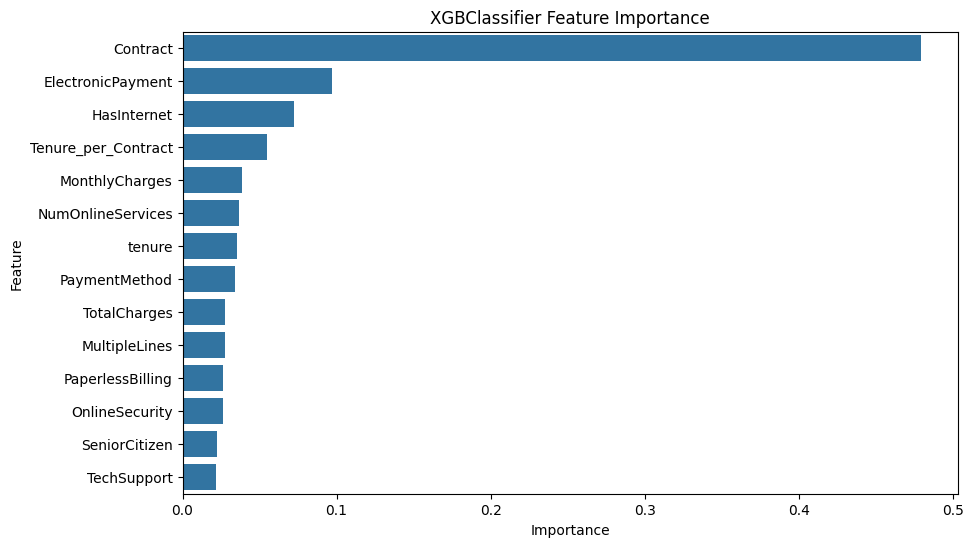

RandomForest: 0.8019872249822569
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.53      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409

[[933 102]
 [177 197]]


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


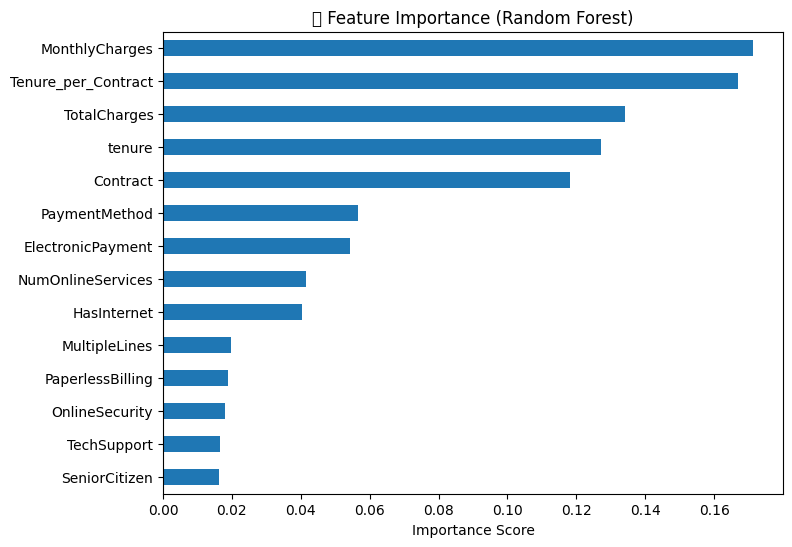

In [18]:

y = df1['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
xgb = XGBClassifier(
    n_estimators=250,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.6,
    objective='binary:logistic',
    eval_metric='logloss',
    early_stopping_rounds=50,
    random_state=42
)

xgb.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        verbose=False)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))
print("Best n_estimators:", xgb.best_iteration)

importances = xgb.feature_importances_
feat_names = X.columns
feat_importance_df = pd.DataFrame({'Feature':feat_names, 'Importance':importances})
feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df)
plt.title("XGBClassifier Feature Importance")
plt.show()

rf_model = RandomForestClassifier(
    n_estimators=150,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("RandomForest:", acc)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

importances = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)


plt.figure(figsize=(8,6))
importances.plot(kind='barh')
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.title("🔥 Feature Importance (Random Forest)")
plt.show()



ROC-AUC Score: 0.8479901314939677


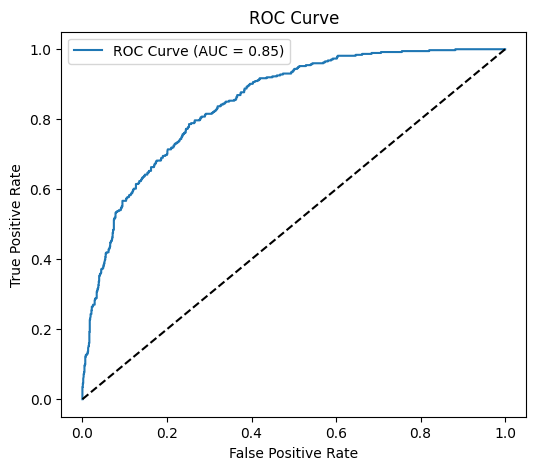

In [19]:
y_prob = xgb.predict_proba(X_test)[:, 1]
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], 'k--')  # random line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [20]:
df1.columns

Index(['SeniorCitizen', 'tenure', 'MultipleLines', 'OnlineSecurity',
       'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'HasInternet',
       'ElectronicPayment', 'NumOnlineServices', 'Tenure_per_Contract'],
      dtype='object')

In [21]:
# Index(['SeniorCitizen', 'tenure', 'MultipleLines', 'OnlineSecurity',
#        'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod',
#        'MonthlyCharges', 'TotalCharges', 'Churn', 'HasInternet',
#        'ElectronicPayment', 'NumOnlineServices', 'Tenure_per_Contract'],
#       dtype='object')

## apply smote

In [22]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(
    X_train, y_train
)


In [23]:
print(y_train.value_counts())
print(y_train_smote.value_counts())


Churn
0    4139
1    1495
Name: count, dtype: int64
Churn
0    4139
1    4139
Name: count, dtype: int64


In [24]:
# xgb.fit(
#     X_train_smote,
#     y_train_smote,
#     eval_set=[(X_test, y_test)],
#     verbose=False
# )

# Alternative to SMOTE for XGBoost
scale_pos_weight = len(y_train[y_train==0]) / len(y_train[y_train==1])

xgb = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[821 214]
 [120 254]]
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1035
           1       0.54      0.68      0.60       374

    accuracy                           0.76      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.78      0.76      0.77      1409



## scale_pos_weight apply

  [[821 214]

  [120 254]]

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1035
           1       0.54      0.68      0.60       374

    accuracy                           0.76      1409
    macro avg       0.71      0.74     0.72      1409
    weighted avg    0.78      0.76     0.77      1409


## Smote apply

[[811 224]

 [111 263]]

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1035
           1       0.54      0.70      0.61       374

    accuracy                           0.76      1409
    macro avg       0.71      0.74     0.72      1409
    weighted avg    0.79      0.76     0.77      1409


## Original xgb model

XGBoost: 0.8161816891412349

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1035
           1       0.70      0.54      0.61       374

    accuracy                           0.82      1409
    macro avg       0.77      0.73     0.74      1409
    weighted avg    0.81      0.82     0.81      1409

 [[949  86]

 [173 201]]



**Observations:**

- Accuracy dropped from 0.82 → 0.76 (expected due to more minority class predictions)  
- Recall for minority class (Yes Churn) improved from 0.54 → 0.70 → **more churners detected**  
- Class 0 (No Churn) recall decreased (0.92 → 0.78)  
- F1-score for minority class slightly improved  
- Macro average recall increased (0.73 → 0.74)  

---

## 3️⃣ Key Insights

- **SMOTE improves minority class detection**  
- Overall accuracy may drop → normal in imbalanced datasets  
- For churn prediction, **recall of churners is more important than overall accuracy**  

---

## 4️⃣ Recommendation

- **Business goal:** Catch as many churners as possible → **use SMOTE** ✅  
- **Goal:** Maximize overall accuracy → stick with **original model** ❌  

**Business Perspective:**

- Missing churners → potential lost revenue  
- Misclassifying non-churners → minor marketing cost  

> Usually, for churn prediction, **prioritize higher recall for the minority class** → SMOTE preferred  

---



In [25]:
import numpy as np
import pandas as pd

def preprocess_churn_fast(df: pd.DataFrame, is_train=True):
    """
    Preprocessing for Telecom Churn dataset.

    Args:
        df (pd.DataFrame): Input dataframe
        is_train (bool): True if training data (for target)

    Returns:
        pd.DataFrame: Preprocessed dataframe
    """
    df = df.copy()

    # -----------------------------
    # 1️⃣ Binary Columns Encoding (vectorized)
    # -----------------------------
    df['gender'] = (df['gender'] == 'Male').astype(np.uint8)
    df['Partner'] = (df['Partner'] == 'Yes').astype(np.uint8)
    df['Dependents'] = (df['Dependents'] == 'Yes').astype(np.uint8)
    df['PhoneService'] = (df['PhoneService'] == 'Yes').astype(np.uint8)
    df['PaperlessBilling'] = (df['PaperlessBilling'] == 'Yes').astype(np.uint8)

    # -----------------------------
    # 2️⃣ MultipleLines (vectorized)
    # -----------------------------
    if 'MultipleLines' in df.columns:
        df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')
        df['MultipleLines'] = (df['MultipleLines'] == 'Yes').astype(np.uint8)

    # -----------------------------
    # 3️⃣ Internet features
    # -----------------------------
    if 'InternetService' in df.columns:
        df['HasInternet'] = (df['InternetService'] != 'No').astype(np.uint8)
        internet_map = {'No': 1, 'DSL': 2, 'Fiber optic': 3}
        df['InternetService'] = df['InternetService'].map(internet_map).astype(np.uint8)

    internet_cols = [
        'OnlineSecurity','OnlineBackup','DeviceProtection',
        'TechSupport','StreamingTV','StreamingMovies'
    ]
    existing_cols = [c for c in internet_cols if c in df.columns]

    df[existing_cols] = df[existing_cols].replace('No internet service', 'No')
    # Convert Yes/No to np.uint8 (vectorized)
    df[existing_cols] = (df[existing_cols] == 'Yes').astype(np.uint8)

    # -----------------------------
    # 4️⃣ Contract
    # -----------------------------
    if 'Contract' in df.columns: ## start 1 -> inf error
        contract_map = {'Month-to-month': 1, 'One year': 2, 'Two year': 3}
        df['Contract'] = df['Contract'].map(contract_map).astype(np.uint8)

    # -----------------------------
    # 5️⃣ PaymentMethod + ElectronicPayment
    # -----------------------------
    if 'PaymentMethod' in df.columns:
        payment_map = {
            'Credit card (automatic)': 0,
            'Bank transfer (automatic)': 1,
            'Mailed check': 2,
            'Electronic check': 3
        }
        df['PaymentMethod'] = df['PaymentMethod'].map(payment_map).astype(np.uint8)

        if 'PaperlessBilling' in df.columns:
            df['ElectronicPayment'] = ((df['PaperlessBilling']==1) & (df['PaymentMethod']==3)).astype(np.uint8)

    # -----------------------------
    # 6️⃣ Churn
    # -----------------------------
    if is_train and 'Churn' in df.columns:
        df['Churn'] = (df['Churn'] == 'Yes').astype(np.uint8)

    # -----------------------------
    # 7️⃣ TotalCharges
    # -----------------------------
    if 'TotalCharges' in df.columns:
        df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].replace(' ', np.nan), errors='coerce')
        if 'MonthlyCharges' in df.columns:
            df['TotalCharges'] = df['TotalCharges'].fillna(df['MonthlyCharges'])

    # -----------------------------
    # 8️⃣ Feature Engineering (vectorized sum)
    # -----------------------------
    online_services_cols = [c for c in ['OnlineSecurity','OnlineBackup','TechSupport'] if c in df.columns]
    if online_services_cols:
        df['NumOnlineServices'] = df[online_services_cols].sum(axis=1).astype(np.uint8)

    if 'tenure' in df.columns and 'Contract' in df.columns:
        df['Tenure_per_Contract'] = (df['tenure'] / (df['Contract'] + 1e-5)).astype(np.float32)

    # -----------------------------
    # 9️⃣ Drop unnecessary columns
    # -----------------------------
    drop_cols = [
        'customerID','gender','Dependents','Partner','PhoneService',
        'OnlineBackup','DeviceProtection','StreamingTV','StreamingMovies','InternetService'
    ]
    df.drop(columns=[c for c in drop_cols if c in df.columns], inplace=True)

    return df
